Mean Company Age:
 iscustomer
Non-Customer    26.101570
Customer        26.900208
Name: age, dtype: float64


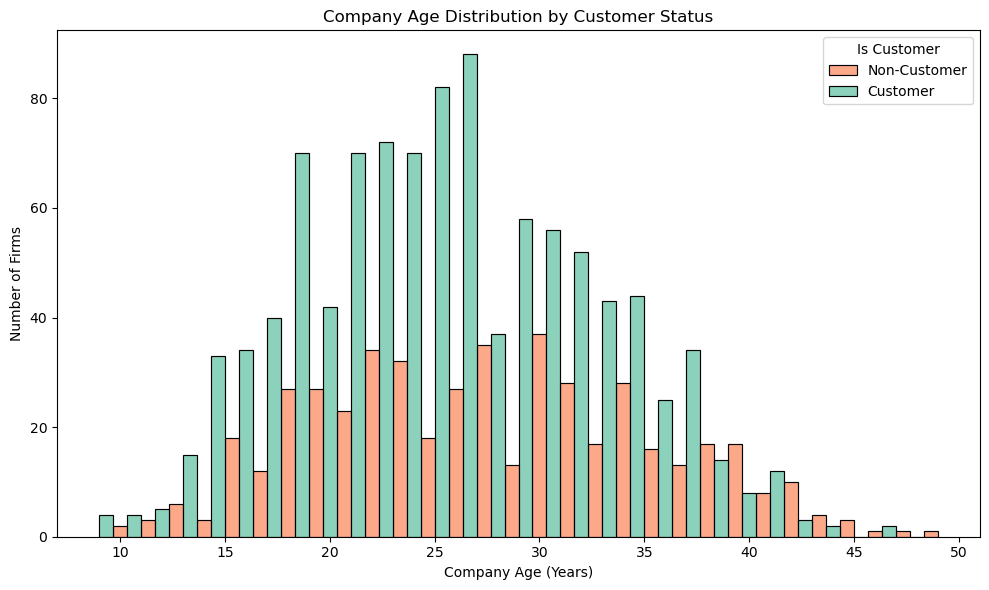


Region Distribution by Customer Status:

           Non-Customer  Customer
region                           
Midwest        0.834821  0.165179
Northeast      0.454243  0.545757
Northwest      0.844920  0.155080
South          0.816754  0.183246
Southwest      0.824916  0.175084


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("blueprinty.csv")

age_means = df.groupby("iscustomer")["age"].mean().rename(index={0: "Non-Customer", 1: "Customer"})
print("Mean Company Age:\n", age_means)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='iscustomer', bins=30, palette='Set2', multiple='dodge')
plt.title("Company Age Distribution by Customer Status")
plt.xlabel("Company Age (Years)")
plt.ylabel("Number of Firms")
plt.legend(title='Is Customer', labels=['Non-Customer', 'Customer'])
plt.tight_layout()
plt.show()

region_dist = pd.crosstab(df["region"], df["iscustomer"], normalize="index")
region_dist.columns = ["Non-Customer", "Customer"]
print("\nRegion Distribution by Customer Status:\n")
print(region_dist)

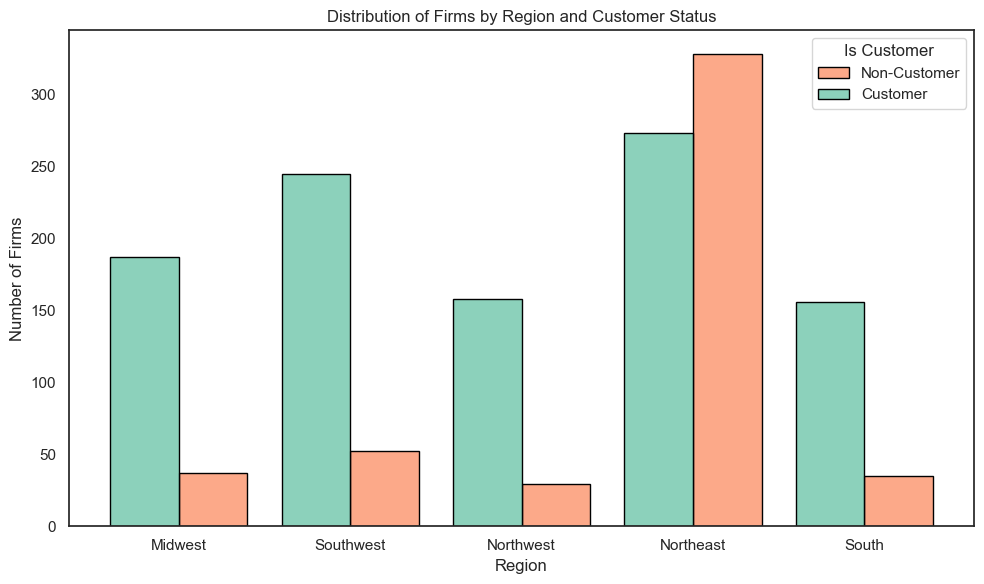

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv("blueprinty.csv")

# 设置无网格样式
sns.set_style("white")  # 或者使用 "ticks" 也可以

# 绘图：地区直方图（按客户状态）
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='region',
    hue='iscustomer',
    multiple='dodge',
    shrink=0.8,
    palette='Set2',
    stat='count',
    edgecolor='black'
)

plt.title("Distribution of Firms by Region and Customer Status")
plt.xlabel("Region")
plt.ylabel("Number of Firms")
plt.legend(title='Is Customer', labels=['Non-Customer', 'Customer'])

# 去掉网格线
plt.grid(False)

plt.tight_layout()
plt.show()

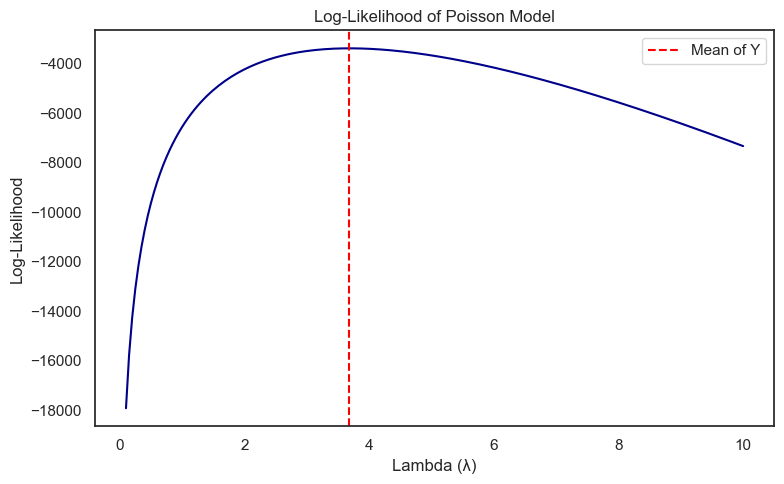

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln  # log(y!) for numerical stability

def poisson_loglikelihood(lmbda, Y):
    if lmbda <= 0:
        return -np.inf  # log likelihood is undefined for λ <= 0
    return np.sum(-lmbda + Y * np.log(lmbda) - gammaln(Y + 1))

import pandas as pd
df = pd.read_csv("blueprinty.csv")
Y = df['patents'].values

# Plot
lambda_vals = np.linspace(0.1, 10, 200)
loglik_vals = [poisson_loglikelihood(lmbda, Y) for lmbda in lambda_vals]

plt.figure(figsize=(8, 5))
plt.plot(lambda_vals, loglik_vals, color='darkblue')
plt.title("Log-Likelihood of Poisson Model")
plt.xlabel("Lambda (λ)")
plt.ylabel("Log-Likelihood")
plt.axvline(np.mean(Y), color='red', linestyle='--', label='Mean of Y')
plt.legend()
plt.tight_layout()
plt.show()

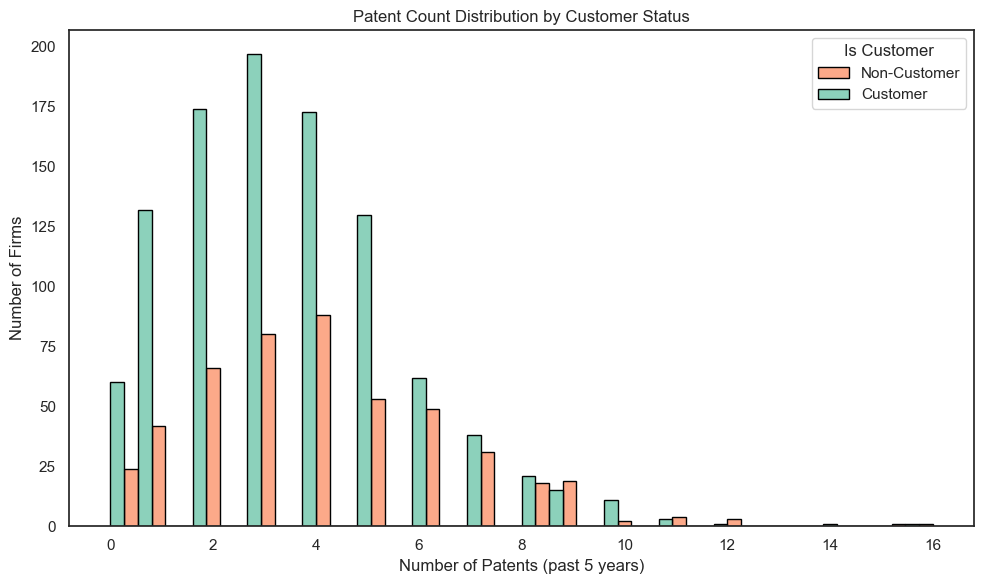

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("blueprinty.csv")
sns.set_style("white")

plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=df,
    x='patents',
    hue='iscustomer',
    bins=30,
    palette='Set2',
    multiple='dodge'
)

for bar in ax.patches:
    bar.set_edgecolor("black")
    bar.set_linewidth(1)

plt.title("Patent Count Distribution by Customer Status")
plt.xlabel("Number of Patents (past 5 years)")
plt.ylabel("Number of Firms")
plt.legend(title='Is Customer', labels=['Non-Customer', 'Customer'])
plt.tight_layout()
plt.show()

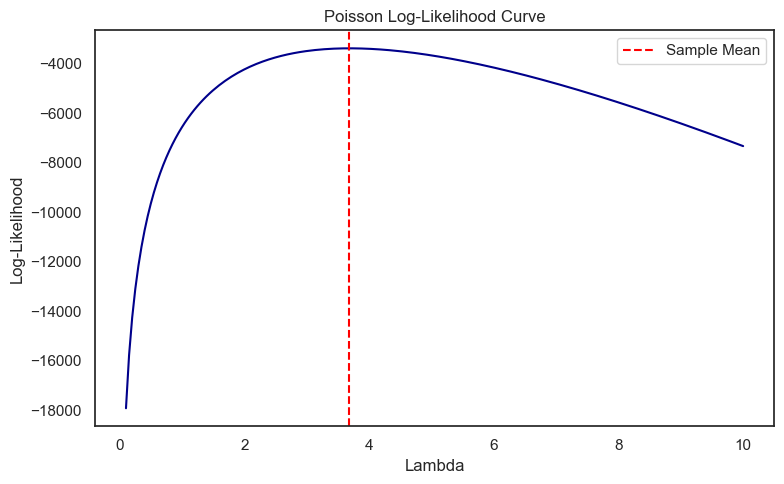

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gammaln

# Load data
df = pd.read_csv("blueprinty.csv")
Y = df["patents"].values

# Log-likelihood function
def poisson_loglikelihood(lmbda, Y):
    if lmbda <= 0:
        return -np.inf
    return np.sum(-lmbda + Y * np.log(lmbda) - gammaln(Y + 1))

# Plot log-likelihood
lambda_vals = np.linspace(0.1, 10, 200)
loglik_vals = [poisson_loglikelihood(lmbda, Y) for lmbda in lambda_vals]

plt.figure(figsize=(8, 5))
plt.plot(lambda_vals, loglik_vals, color='darkblue')
plt.axvline(np.mean(Y), color='red', linestyle='--', label='Sample Mean')
plt.title("Poisson Log-Likelihood Curve")
plt.xlabel("Lambda")
plt.ylabel("Log-Likelihood")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
from scipy.special import gammaln

def poisson_loglikelihood(lmbda, Y):
    if lmbda <= 0:
        return -np.inf  # log likelihood undefined for λ ≤ 0
    return np.sum(-lmbda + Y * np.log(lmbda) - gammaln(Y + 1))

neg_loglik = lambda lmbda: -poisson_loglikelihood(lmbda, Y)

result = minimize_scalar(neg_loglik, bounds=(0.01, 20), method='bounded')

lambda_mle = result.x
print(f"MLE of λ (via optimization): {lambda_mle:.4f}")
print(f"Sample mean of Y (baseline): {np.mean(Y):.4f}")

MLE of λ (via optimization): 3.6847
Sample mean of Y (baseline): 3.6847


In [16]:
import numpy as np
import pandas as pd
from scipy.special import gammaln

# Load the data
df = pd.read_csv("blueprinty.csv")

# Feature engineering
df["age_scaled"] = df["age"] / 10
df["age_sq_scaled"] = (df["age"] ** 2) / 100

# Construct design matrix X
region_dummies = pd.get_dummies(df["region"], drop_first=True)
X = pd.concat([
    pd.Series(1, index=df.index, name="intercept"),
    df[["age_scaled", "age_sq_scaled", "iscustomer"]],
    region_dummies
], axis=1)
X_matrix = X.values
Y = df["patents"].values

def poisson_loglikelihood_beta(beta, Y, X):
    XB = X @ beta
    lambdas = np.exp(XB)
    # handle overflow safely
    if np.any(np.isnan(lambdas)) or np.any(np.isinf(lambdas)):
        return np.inf
    loglik = np.sum(-lambdas + Y * XB - gammaln(Y + 1))
    return -loglik  # negative for use with minimizer

beta_test = np.zeros(X.shape[1])
loglik_value = -poisson_loglikelihood_beta(beta_test, Y, X_matrix)
loglik_value

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 读取数据
df = pd.read_csv("blueprinty.csv")

# 特征构建：标准化 age，防止数值过大导致优化不稳定
df["age_scaled"] = df["age"] / 10
df["age_sq_scaled"] = (df["age"] ** 2) / 100

# 构建 X 设计矩阵（带截距 + age + age² + region dummies + iscustomer）
region_dummies = pd.get_dummies(df["region"], drop_first=True)
X = pd.concat([
    pd.Series(1, index=df.index, name="intercept"),
    df[["age_scaled", "age_sq_scaled", "iscustomer"]],
    region_dummies
], axis=1)
X = X.astype(float)
Y = df["patents"]

# 使用 GLM (Poisson) 拟合
model = sm.GLM(Y, X, family=sm.families.Poisson())
results = model.fit()

# 输出结果表（系数 + 标准误）
summary_df = pd.DataFrame({
    "Coefficient": results.params,
    "Std. Error": results.bse
})
print(summary_df)

               Coefficient  Std. Error
intercept        -0.508920    0.183179
age_scaled        1.486195    0.138686
age_sq_scaled    -0.297047    0.025801
iscustomer        0.207591    0.030895
Northeast         0.029170    0.043625
Northwest        -0.017575    0.053781
South             0.056561    0.052662
Southwest         0.050576    0.047198


In [19]:
X

,intercept,age_scaled,age_sq_scaled,iscustomer,Northeast,Northwest,South,Southwest
0,1.0,3.25,10.5625,0.0,0.0,0.0,0.0,0.0
1,1.0,3.75,14.0625,0.0,0.0,0.0,0.0,1.0
2,1.0,2.70,7.2900,1.0,0.0,1.0,0.0,0.0
3,1.0,2.45,6.0025,0.0,1.0,0.0,0.0,0.0
4,1.0,3.70,13.6900,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1495,1.0,1.85,3.4225,1.0,1.0,0.0,0.0,0.0
1496,1.0,2.25,5.0625,0.0,0.0,0.0,0.0,1.0
1497,1.0,1.70,2.8900,0.0,0.0,0.0,0.0,1.0
1498,1.0,2.90,8.4100,0.0,0.0,0.0,1.0,0.0


In [20]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln

# Load data
df = pd.read_csv("blueprinty.csv")

# Feature scaling
df["age_scaled"] = df["age"] / 10
df["age_sq_scaled"] = (df["age"] ** 2) / 100

# Construct design matrix
region_dummies = pd.get_dummies(df["region"], drop_first=True)
X = pd.concat([
    pd.Series(1.0, index=df.index, name="intercept"),
    df[["age_scaled", "age_sq_scaled", "iscustomer"]],
    region_dummies
], axis=1).astype(float)
X_matrix = X.values
Y = df["patents"].values

# Define Poisson log-likelihood
def poisson_loglikelihood_beta(beta, Y, X):
    XB = X @ beta
    lambdas = np.exp(XB)
    if np.any(np.isnan(lambdas)) or np.any(np.isinf(lambdas)):
        return np.inf
    loglik = np.sum(-lambdas + Y * XB - gammaln(Y + 1))
    return -loglik  # minimize negative log-likelihood

# Optimize
beta_start = np.zeros(X.shape[1])
res = minimize(poisson_loglikelihood_beta, beta_start, args=(Y, X_matrix), method="BFGS")

# Extract coefficient estimates and standard errors
beta_hat = res.x
hessian_inv = res.hess_inv
standard_errors = np.sqrt(np.diag(hessian_inv))

# Create result table
results = pd.DataFrame({
    "Coefficient": beta_hat,
    "Std. Error": standard_errors
}, index=X.columns)

print(results)

               Coefficient  Std. Error
intercept        -0.508925    0.409336
age_scaled        1.486199    0.296445
age_sq_scaled    -0.297048    0.052228
iscustomer        0.207591    0.031828
Northeast         0.029170    0.024360
Northwest        -0.017575    0.045547
South             0.056561    0.045048
Southwest         0.050576    0.024359


In [21]:
# 假设你已有：
# - beta_hat（MLE β 向量）
# - X（原始设计矩阵，DataFrame 格式）

# 创建 X_0 和 X_1
X_0 = X.copy()
X_1 = X.copy()

X_0["iscustomer"] = 0
X_1["iscustomer"] = 1

# 预测两组的 λ（预期专利数）
y_pred_0 = np.exp(X_0 @ beta_hat)
y_pred_1 = np.exp(X_1 @ beta_hat)

# 差值并求平均
effect_vector = y_pred_1 - y_pred_0
average_effect = np.mean(effect_vector)

print(f"Average predicted increase in patents due to Blueprinty: {average_effect:.4f}")

Average predicted increase in patents due to Blueprinty: 0.7928


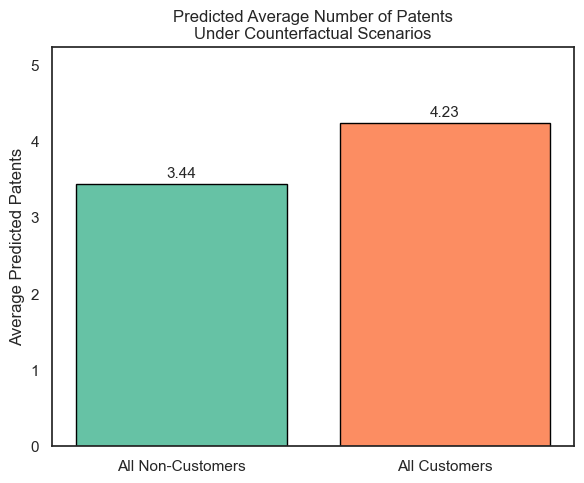

In [24]:
y_pred_0 = np.exp(X_0 @ beta_hat)
y_pred_1 = np.exp(X_1 @ beta_hat)

avg_y_0 = np.mean(y_pred_0)
avg_y_1 = np.mean(y_pred_1)


comparison_df = pd.DataFrame({
    "Scenario": ["All Non-Customers", "All Customers"],
    "Average Predicted Patents": [avg_y_0, avg_y_1]
})


colors = sns.color_palette("Set2")

plt.figure(figsize=(6, 5))
bars = plt.bar(
    comparison_df["Scenario"],
    comparison_df["Average Predicted Patents"],
    color=[colors[0], colors[1]],
    edgecolor="black"
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.title("Predicted Average Number of Patents\nUnder Counterfactual Scenarios")
plt.ylabel("Average Predicted Patents")
plt.ylim(0, max(avg_y_0, avg_y_1) + 1)
plt.tight_layout()
plt.show()

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/Users/junyefan/Desktop/Graduate/Course/2025_Spring/MGTA_495_Marketing_Analytics/Week1/quartosite/HW1/project2/airbnb.csv")

# Select relevant variables
vars_used = [
    "number_of_reviews", "room_type", "bathrooms", "bedrooms", "price",
    "review_scores_cleanliness", "review_scores_location", "review_scores_value",
    "instant_bookable"
]
df = df[vars_used]

# Drop rows with missing values
df_clean = df.dropna()

# Convert instant_bookable to binary
df_clean["instant_bookable"] = (df_clean["instant_bookable"] == "t").astype(int)

# Convert room_type to dummies
df_dummies = pd.get_dummies(df_clean, columns=["room_type"], drop_first=True)

# Poisson Regression
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Build formula (log link implied by default Poisson)
formula = "number_of_reviews ~ bathrooms + bedrooms + price + review_scores_cleanliness + review_scores_location + review_scores_value + instant_bookable + room_type_Private room + room_type_Shared room"

model = glm(formula=formula, data=df_dummies, family=sm.families.Poisson()).fit()
print(model.summary())

/var/folders/31/d8_mdwcs6k53znfr05m5f2mw0000gn/T/ipykernel_50016/1658976266.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["instant_bookable"] = (df_clean["instant_bookable"] == "t").astype(int)


SyntaxError: invalid syntax (<unknown>, line 1)

In [35]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

df = pd.read_csv("/Users/junyefan/Desktop/Graduate/Course/2025_Spring/MGTA_495_Marketing_Analytics/Week1/quartosite/HW1/project2/airbnb.csv")
import seaborn as sns
import matplotlib.pyplot as plt


/var/folders/31/d8_mdwcs6k53znfr05m5f2mw0000gn/T/ipykernel_50016/2796586652.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["instant_bookable"] = (df_clean["instant_bookable"] == "t").astype(int)


                                Coefficient  Std. Error
Intercept                          3.572486    0.016005
room_type_Private_room[T.True]    -0.014535    0.002737
room_type_Shared_room[T.True]     -0.251896    0.008618
bathrooms                         -0.123999    0.003747
bedrooms                           0.074941    0.001988
price                             -0.000014    0.000008
review_scores_cleanliness          0.113187    0.001493
review_scores_location            -0.076795    0.001607
review_scores_value               -0.091529    0.001798
instant_bookable                   0.334397    0.002889
Summary Statistics:
count    30160.000000
mean        21.170889
std         32.007541
min          1.000000
25%          3.000000
50%          8.000000
75%         26.000000
max        421.000000
Name: number_of_reviews, dtype: float64
Skewness: 3.1723046468074183
Kurtosis: 14.564929111706064


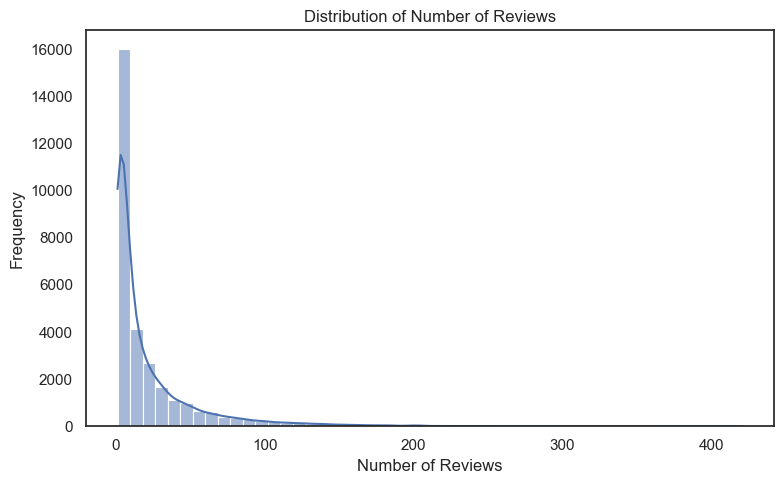

In [36]:
vars_used = [
    "number_of_reviews", "room_type", "bathrooms", "bedrooms", "price",
    "review_scores_cleanliness", "review_scores_location", "review_scores_value",
    "instant_bookable"
]
df = df[vars_used]

# Drop rows with missing values
df_clean = df.dropna()

# Convert variables
df_clean["instant_bookable"] = (df_clean["instant_bookable"] == "t").astype(int)
df_dummies = pd.get_dummies(df_clean, columns=["room_type"], drop_first=True)
df_dummies.columns = df_dummies.columns.str.replace(" ", "_")

# Poisson regression
formula = (
    "number_of_reviews ~ bathrooms + bedrooms + price + "
    "review_scores_cleanliness + review_scores_location + "
    "review_scores_value + instant_bookable + "
    "room_type_Private_room + room_type_Shared_room"
)
model = glm(formula=formula, data=df_dummies, family=sm.families.Poisson()).fit()
results_df = pd.DataFrame({
    "Coefficient": model.params,
    "Std. Error": model.bse
})
print(results_df)

# 定义目标列
reviews = df_clean["number_of_reviews"]

# 描述性统计
print("Summary Statistics:")
print(reviews.describe())
print("Skewness:", reviews.skew())
print("Kurtosis:", reviews.kurtosis())

# 分布图
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(reviews, bins=50, kde=True)
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

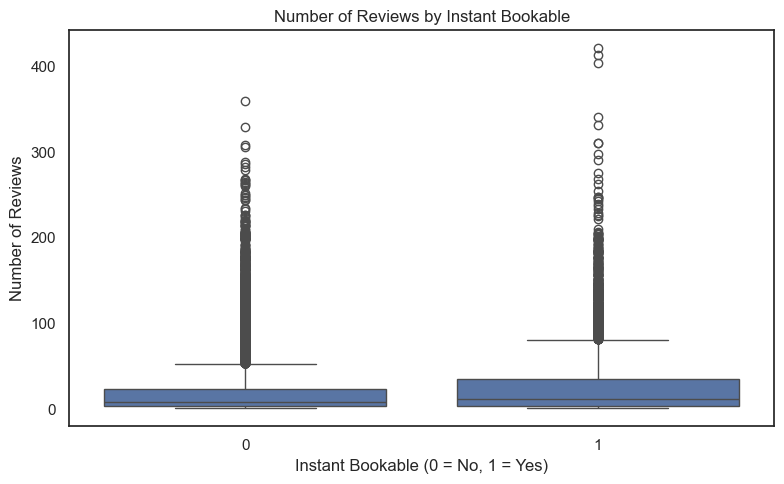

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 确保数据中包含这两个变量
# 如果你之前已经做了 df_clean["instant_bookable"] = ...，你可以这样画：

plt.figure(figsize=(8, 5))
sns.boxplot(x="instant_bookable", y="number_of_reviews", data=df_clean)
plt.title("Number of Reviews by Instant Bookable")
plt.xlabel("Instant Bookable (0 = No, 1 = Yes)")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()